<a href="https://colab.research.google.com/github/HatemGamal/ElectroPi/blob/main/OCR_for_National_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 14s (333 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [3]:
#If you want to know for a specific pip package installation path you can always use
!pip show pytesseract

Name: pytesseract
Version: 0.3.10
Summary: Python-tesseract is a python wrapper for Google's Tesseract-OCR
Home-page: https://github.com/madmaze/pytesseract
Author: Samuel Hoffstaetter
Author-email: samuel@hoffstaetter.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: packaging, Pillow
Required-by: 


In [4]:
#If you want to install Arabic for example in Google Colab
#download the file
! wget https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/master/ara.traineddata

--2023-11-06 14:09:12--  https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/master/ara.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12603724 (12M) [application/octet-stream]
Saving to: ‘ara.traineddata’

ara.traineddata     100%[===================>]  12.02M  --.-KB/s    in 0.09s   

2023-11-06 14:09:13 (134 MB/s) - ‘ara.traineddata’ saved [12603724/12603724]



In [5]:
#Then move it to Tessdata path
! sudo mv "/content/ara.traineddata" "/usr/share/tesseract-ocr/4.00/tessdata"

In [6]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [11]:
from google.colab import files
uploaded = files.upload()

Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg


In [12]:
pytesseract.get_languages(config='')

['ara', 'eng', 'osd']

In [22]:
image_path_in_colab='/content/2.jpg'

In [15]:
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

   

" ¥S ¥ ve Be

tf



In [34]:
import cv2
import numpy as np
import pandas as pd

In [25]:
img = cv2.imread(image_path_in_colab,0)

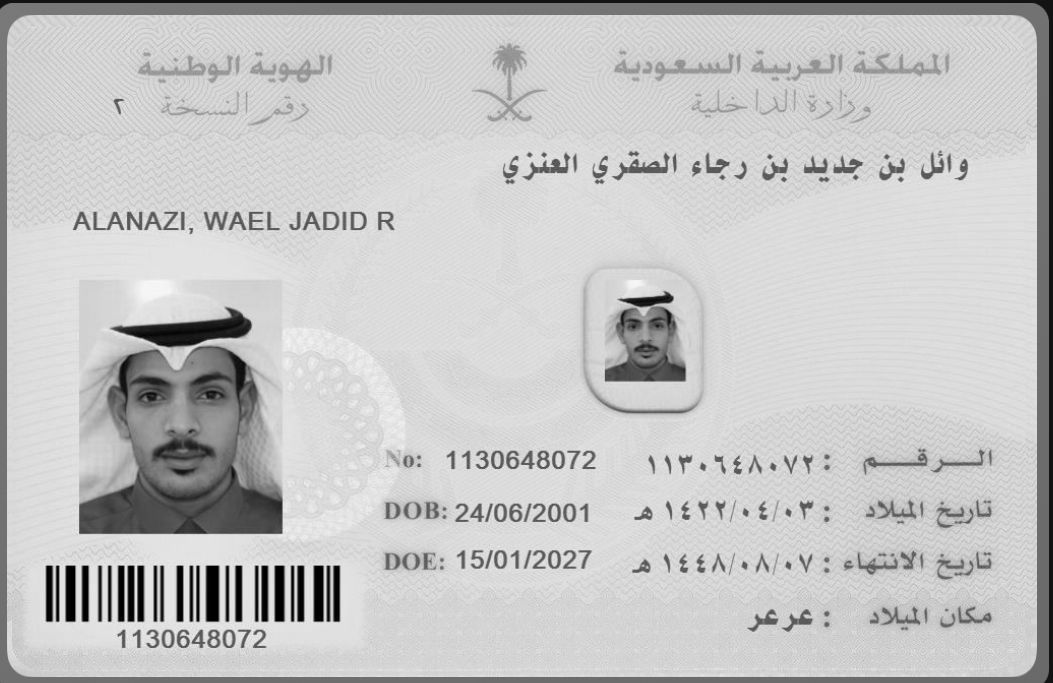

In [26]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [28]:
extractedInformation = pytesseract.image_to_string(img, lang='ara')
print(extractedInformation)

المملكة العربية السعودية ان
: ري -
8

الهوية الوطنية
: َ

حل

وائل بن جديد بن رجاء الصقري العنز
انال اآخللا ,امخذلامام

ها م

الرقم : ددديت. ‎٠: 2 ١١١‏
تاريخ الميلاد : 577042/07٠١ه‏ 24/06/2001 :0013

تاريخ الانتهاء : /01/ ‎١21/0‏ ها 15/01/2027 :0ط | 00 | اا |||
مكان الميلاد :
عرمر 172

 



## **Image Preprocessing**

In [29]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [30]:
import matplotlib.pyplot as plt


(<Axes: >, <matplotlib.image.AxesImage at 0x7eeffb897e50>)

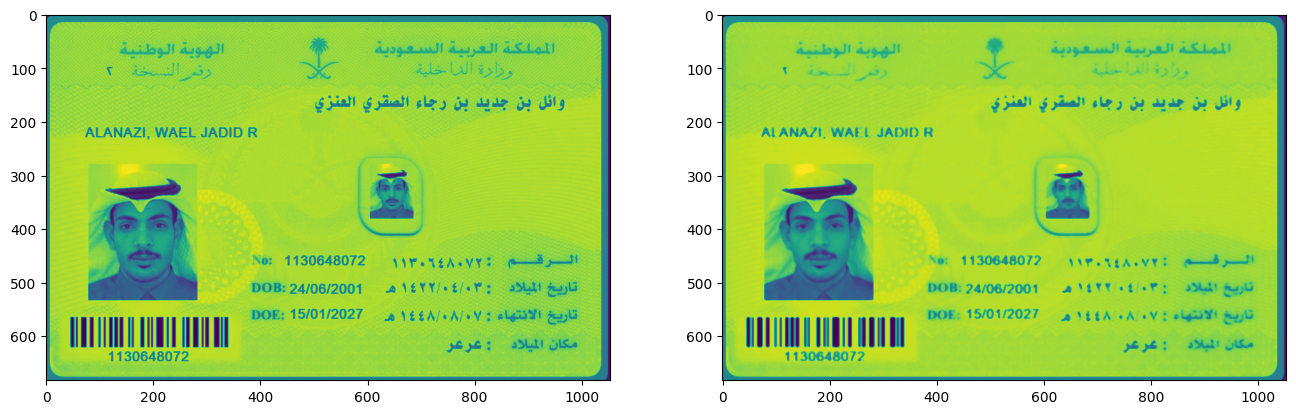

In [31]:
img2 = remove_noise(img)
plt.figure(figsize=(16,10))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(img2)


In [36]:
# save ectracted information to a dataframe
df = pytesseract.image_to_data(img2, lang='ara+eng', output_type='data.frame')
df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1053,683,-1,NaN
1,2,1,1,0,0,0,499,48,22,22,-1,NaN
2,3,1,1,1,0,0,499,48,22,22,-1,NaN
3,4,1,1,1,1,0,499,48,22,22,-1,NaN
4,5,1,1,1,1,1,499,48,22,22,40,*
5,2,1,2,0,0,0,74,152,894,80,-1,NaN
6,3,1,2,1,0,0,74,152,894,80,-1,NaN
7,4,1,2,1,1,0,503,152,465,32,-1,NaN
8,5,1,2,1,1,1,921,156,47,24,91,وائل
9,5,1,2,1,1,2,879,155,26,26,93,بن
